# ISCTE-IUL - 23/24 - Licenciatura em Engenharia Informática - Desenho e Análise de Algoritmos
## Minitrabalho 2 - O Oráculo de Bacon
 Realizado por:
   - André Simões Soares nº110993
   - Carlos Eduardo Delgado Monteiro nº111284

## 1. Representação dos Dados

### 1.a. Características do Grafo

__Vértices:__ vai representar cada ator/atriz de Hollywood.
<br> __Arestas:__ vai representar a ligação entre atores/atrizes com filmes onde ambos atuaram.

__Modelo do Grafo:__ o grafo que vai ser implementado será o não-orientado , porquê a relação entre dois atores é bidirecional 
(o ator X atuou com o ator Y num filme , então o ator Y atuou com o ator X no mesmo filme) e também escolhemos este grafo devido a estes critérios:

_Vantagens:_ 
- simplifica a estrutura do grafo (facilitação das operações do jogo & conectar atores diretamente através de filmes que aturam juntos) 
- ocupa menos espaço na memória (menos informações nas arestas)
- facilidade de encontrar atores que atuaram em comum
        
_Desvantagens:_ 
- falta de eficiência de tempo para encontrar o menor caminho entre dois atores em termos de número de filmes

__Alterações na classe _Graph_ , _Vertex_ & _Edge_ :__ 
- Na classe Vertex , alteramos o nome do parâmetro no construtor vertex_id para actor_name 
- Na classe Edge alteramos o peso para o movie_name , onde será o filme onde ambos os atores atuaram
- Na classe Graph implementámos o método _Edge()_ que devolve um iterável sobre todas as arestas do Grafo.



### Implementação da classe Node , Edge & Graph

In [9]:
# Class Vertice
class Vertex:
    
    def __init__(self, actor_name):
        '''O vértice será inserido no Grafo usando o método insert_vertex(x) que cria um Vertex'''
        self._vertex_id = actor_name   # nome do ator (elemento do vértice)
        
    def __hash__(self):
        '''O valor do elemento é usado como hash para o vértice (o elemento deve ser hashable)'''
        return hash(self._vertex_id)  # devolve o hash do elemento

    def __str__(self):
        return'v{0}'.format(self._vertex_id)

    def __eq__(self, vertex):
        return self._vertex_id == vertex._vertex_id # Deve-se garantir que: se hash(vertex)==hash(self), entao vertex==self

    def __lt__(self, vertex):
        return self._vertex_id < vertex._vertex_id
    
    def __le__(self, vertex):
        return self._vertex_id <= vertex._vertex_id
    
    def __gt__(self, vertex):
        return self._vertex_id > vertex._vertex_id
    
    def __ge__(self, vertex):
        return self._vertex_id >= vertex._vertex_id
    
    def vertex_id(self):
        ''' Devolve o elemento guardado neste vértice.'''
        return self._vertex_id


# Class Edge
class Edge:
    ''' Estrutura de Aresta para um Grafo: (origem, destino) e peso '''

    def __init__(self, vertex_1, vertex_2, movie_name):
        self._vertex_1 = vertex_1
        self._vertex_2 = vertex_2
        self._movie_name = movie_name

    def __hash__(self):
        # Função que mapeia a aresta a uma posição no dicionário (hash map)
        return hash( (self._vertex_1, self._vertex_2) )

    def __str__(self):
        ''' Devolve a representação do objeto aresta em string: (origem, destino)m=filme '''
        return'E({0}|{1})m={2}'.format(self._vertex_1, self._vertex_2, self._movie_name)

    def __eq__(self, other):
        # define igualdade de duas arestas (deve ser consistente com a função hash)
        return self._vertex_1 == other._vertex_1 and self._vertex_2 == other._vertex_2

    def endpoints(self):
        ''' Devolve a tupla (vertex_1, vertex_2) os vértices adjacentes vertex_1 e vertex_2.'''
        return (self._vertex_1, self._vertex_2)
    
    def cost(self):
        ''' Devolve o peso da aresta.'''
        return self._movie_name
    
    def opposite(self, vertex):
        ''' Indica o vértice oposto ao vertex nesta aresta 
            (apenas se vertex fizer parte da aresta).'''
        if vertex == self._vertex_1:
            return self._vertex_2
        elif vertex == self._vertex_2:
            return self._vertex_1
        else:
            return None

In [10]:
class Graph:
    def __init__(self):
        '''Construtor: Cria um grafo vazio (dicionário de _adjancencies).'''
        self._adjancencies = {}  # dicionário que associa o par chave-valor: <Vertex v, Mapa de adjacências de v> 
        self._vertices = {}      # dicionário que associa o par: <id do vértice, objeto Vertex correspondente> 
        self._n = 0              # número de vértices do grafo
        self._m = 0              # número de arestas do grafo
        
    def __str__(self):
        '''Devolve a representação do grafo em string (toString)'''
        if self._n == 0:
            ret = "DAA-Graph: <empty>\n"
        else:
            ret = "DAA-Graph:\n"
            for vertex in self._adjancencies.keys():
                #ret += "vertex-"
                ret += str(vertex) + ": "
                for edge in self.incident_edges(vertex.vertex_id()):
                    ret += str(edge) + "; "
                ret += "\n"
        return ret
    
    def order(self):
        '''Ordem de um grafo: a quantidade de vértices no Grafo.'''
        return self._n
    
    def size(self):
        '''Dimensão de um grafo: a quantidade total de arestas do Grafo.'''
        return self._m 
    
    def has_vertex(self, vertex_id):
        '''Verifica se o vértice de id vertex_id está no grafo.'''
        return vertex_id in self._vertices
    
    def has_edge(self, u_id, v_id):
        '''Verifica se a aresta (u_id, v_id) existe no grafo.'''
        if not self.has_vertex(u_id) or not self.has_vertex(v_id):
            return False
        else:
            vertex_u = self._vertices[u_id]
            vertex_v = self._vertices[v_id]
            return vertex_v in self._adjancencies[vertex_u]
        
    def insert_vertex(self, vertex_id):
        '''Insere um novo vértice com o id vertex_id.'''
        if not self.has_vertex(vertex_id):
            vertex = Vertex(vertex_id)
            self._vertices[vertex_id] = vertex  # insere o novo vértice no dicionario de vertices
            self._adjancencies[vertex] = {}     # inicializa o mapa de adjacências deste vértice a vazio
            self._n +=1                         # mais um vértice no grafo

    def insert_edge(self, u_id, v_id, movie_name):
        ''' Cria e insere uma nova aresta entre u_id e v_id com peso weight.
            Se a aresta já existe no grafo, atualiza-se o seu peso.
            Também insere os vértices u_id e v_id, caso não existam.'''
        if not self.has_vertex(u_id):
            self.insert_vertex(u_id) # insere novo vertex e atualiza n
        if not self.has_vertex(v_id):
            self.insert_vertex(v_id) # insere novo vertex e atualiza n      
        if not self.has_edge(u_id, v_id):
            self._m +=1           # atualiza m apenas se a aresta ainda não existir no grafo

        vertex_u = self._vertices[u_id]
        vertex_v = self._vertices[v_id]
        e = Edge(vertex_u, vertex_v, movie_name)    
        self._adjancencies[vertex_u][vertex_v] = e  # coloca v nas adjacências de u
        self._adjancencies[vertex_v][vertex_u] = e  # e u nas adjacências de v (para facilitar a procura de todas as arestas incidentes num vértice)
    
    def incident_edges(self, vertex_id):
        '''Devolve um iterável (gerador) com todas as arestas de um vértice com id vertex_id.'''
        vertex = self._vertices[vertex_id]
        for edge in self._adjancencies[vertex].values(): # para todas as arestas incidentes em v:
            yield edge
    
    
    def get_vertex(self, vertex_id):
        ''' Devolve o objeto Vertex associado ao elemento vertex_id no grafo
        '''
        return None if not self.has_vertex(vertex_id) else self._vertices[vertex_id] 
    
    def get_edge(self, u_id, v_id):
        ''' Devolve o objeto aresta (Edge) que liga u_id a v_id. 
            Devolve None se não forem adjacentes ou se (um d)os vértices não existirem.'''  
        #if u_id not in self._adjancencies or v_id not in self._adjancencies:
        if not self.has_edge(u_id, v_id):
            return None
        else:
            vertex_u = self._vertices[u_id]
            vertex_v = self._vertices[v_id]
            return self._adjancencies[vertex_u][vertex_v]
    
    def vertices(self):
        return self._vertices.keys()
    
    def edges(self):
        '''Devolve um iterável sobre todas as arestas do Grafo'''
        result = set()  # Use a set to avoid duplicate edges
        for vertex in self._adjancencies:
            for edge in self._adjancencies[vertex].values():
                result.add(edge)
        return result
    
    # To check in String format
    '''  
    def vertices(self):

        return ', '.join(str(vertex) for vertex in self._vertices.values())

    def edges(self):
        result = set()  # Use a set to avoid duplicate edges
        for vertex in self._adjancencies:
            for edge in self._adjancencies[vertex].values():
                result.add(str(edge))
        return ', '.join(result)
    '''

### 1.b. Implementação da função para construir um Graph a partir dos dados de um ficheiro .txt

In [11]:
def build_graph_from_file(file_name):
    graph = Graph()
    with open(file_name, 'r' , encoding='utf-8') as file:
        for line in file:
            info = line.strip().split('/')
            movie = info[0]
            actors = info[1:]
            for i in range(len(actors)):
                for j in range(i + 1, len(actors)):
                    graph.insert_edge(actors[i], actors[j], movie)

    return graph

#Test
graph = build_graph_from_file("test_dataset.txt")
#print(graph)
#print("Graph vertices:", graph.vertices())
#print("Graph edges:", graph.edges())

Graph vertices: dict_keys(['McCulloch, Ian (I)', 'Cliver, Al', 'Dakkar', 'Haggerty, Captain', 'Fantasia, Franco', "Dell'Acqua, Alberto", 'Fulci, Lucio', 'Gavero, Leo', "Dell'Acqua, Ottaviano", "Dell'Acqua, Arnaldo", "Dell'Acqua, Roberto", 'Johnson, Richard (I)', 'Bologna, Ugo', 'Karlatos, Olga', 'Gay, Auretta', 'Farrow, Tisa', "D'Amario, Stefania", 'Vaughn, Vince', 'Thurman, Dechen', 'Odadjian, Shavo', 'Crown, Taj', 'Lagerfeld, Karl', 'Lieberz, Herb', 'Chatwal, Vikram', 'Kum, Ming Ho', 'Slavin, Randall (I)', 'Bass, Lance', 'Wilson, Andrew (III)', 'Winzenried, Eric', 'Kmetko, Steve', 'K-Roc', 'Elsokari, Tarek', 'Rich, Richie (I)', 'McAlpin, Michael', 'Fabio (I)', 'Dick, Andy (I)', 'Godfrey', 'Manning, Alexandre', 'Vargas, John (I)', 'Hart, Taylor Gerard', 'Word, Scotty F.', 'Hilfiger, Tommy', 'Levin, Matt (I)', 'Highsmith, Asio', 'McNish, Colin', 'Kravitz, Lenny', 'Richardson, Shabazz', 'Stiller, Jerry', 'Johnson, Eliot', 'Kanal, Tony', 'Aucoin, Kevyn', 'Shandling, Garry', 'Chu, Stan', 

## 2. API HollywoodOracle

### 2.b. Implementação da API HollywoodOracle

In [12]:
class HollywoodOracle:
    def __init__(self, filename):
        self.graph = build_graph_from_file(filename)  # Builds the graph from a file
        self.center = "Bacon, Kevin"
        self.distances = {}
        self.calculate_distances(self.center)
    
    def calculate_distances(self, center):
        # This would implement a Breadth-First Search (BFS) from 'center' and calculate the minimum path to all other actors
        from collections import deque
        queue = deque([center])
        visited = set([center])
        self.distances = {center: 0}
        
        while queue:
            current = queue.popleft()
            current_vertex = self.graph.get_vertex(current)
            for edge in self.graph.incident_edges(current):
                opposite_vertex = edge.opposite(current_vertex)
                if opposite_vertex.vertex_id() not in visited:
                    visited.add(opposite_vertex.vertex_id())
                    queue.append(opposite_vertex.vertex_id())
                    self.distances[opposite_vertex.vertex_id()] = self.distances[current] + 1
    
    def all_movies(self):
        # Return all unique movie names from the graph
        return set(edge.cost() for edge in self.graph.edges())

    def all_actors(self):
        # Return all actor names
        return self.graph.vertices()

    def movies_from(self, actor):
        # Return all movies this actor has participated in
        return set(edge.cost() for edge in self.graph.incident_edges(actor))

    def cast_of(self, movie):
        # Return all actors in a given movie
        return set(vertex for edge in self.graph.edges() if edge.cost() == movie for vertex in edge.endpoints())

    def set_center_of_universe(self, actor):
        # Set a new center and recalculate distances
        self.center = actor
        self.calculate_distances(actor)

    def number_of_X(self, actor):
        # Return the "number of X" for the given actor
        return self.distances.get(actor, float('inf'))

    def path_to_X(self, actor):
        # Generate the path from actor to the current center of the universe
        if actor not in self.distances:
            return None
        
        path = []
        current = actor
        while current != self.center:
            for edge in self.graph.incident_edges(current):
                opposite = edge.opposite(self.graph.get_vertex(current))
                if self.distances[opposite.vertex_id()] == self.distances[current] - 1:
                    path.append((current, edge.cost(), opposite.vertex_id()))
                    current = opposite.vertex_id()
                    break
        return path

    def max_number_of_X(self):
        # Find the maximum "number of X" and count actors with infinite distance
        max_distance = max(self.distances.values())
        count_infinite = len(set(self.all_actors()) - set(self.distances.keys()))
        return max_distance, count_infinite

    def count_number_of_X(self, n):
        # Count how many actors have the specified "number of X"
        return sum(1 for distance in self.distances.values() if distance == n)

    def average_number_of_X(self):
        # Calculate the average "number of X" excluding actors with infinite distance
        finite_distances = [distance for distance in self.distances.values() if distance != float('inf')]
        return sum(finite_distances) / len(finite_distances) if finite_distances else 0

### Verificação da API Hollywood oracle

In [13]:
oracle = HollywoodOracle('small_dataset_utf8.txt')
def test_hollywood_oracle(graph):
    
    '''
    print("All movies:")
    print(list(graph.all_movies()))
    
    print("\nAll actors:")
    print(list(graph.all_actors()))
    '''
    
    print("\nMovies from 'Bosco, Philip':")
    print(list(graph.movies_from('Bosco, Philip'))) 
    
    #print("\nCast of '3 Men and a Baby (1987)':")
    #cast_Actors = list(graph.cast_of('3 Men and a Baby (1987)'))
    #print(cast_Actors)
    
    print("\nPath from 'Bosco, Philip' to new center 'Bacon, Kevin':")
    print(graph.path_to_X('Bosco, Philip'))
    
    print("\nMax number of X:")
    print(graph.max_number_of_X())
    
    print("\nCount number of X = 2:")
    print(graph.count_number_of_X(2))
    
    print("\nAverage number of X:")
    print(graph.average_number_of_X())

# Call the test function
test_hollywood_oracle(oracle)


Movies from 'Bosco, Philip':
['Freedomland (2006)', 'Deconstructing Harry (1997)', 'Money Pit, The (1986)', 'Trading Places (1983)', 'Blue Steel (1990)', 'Quick Change (1990)', "Nobody's Fool (1994)", 'Suspect (1987)', 'It Takes Two (1995)', 'Another Woman (1988)', 'First Wives Club, The (1996)', '3 Men and a Baby (1987)', 'F X2 (1991)', 'Milk Money (1994)', "My Best Friend's Wedding (1997)", 'Dream Team, The (1989)', 'Wonder Boys (2000)', 'Abandon (2002)', 'Shaft (2000)', 'Kate & Leopold (2001)', 'Working Girl (1988)', 'Children of a Lesser God (1986)', 'Shadows and Fog (1992)', 'Hitch (2005 I)']

Cast of '3 Men and a Baby (1987)':
[<__main__.Vertex object at 0x000001905E5C3E50>, <__main__.Vertex object at 0x00000190389DF890>, <__main__.Vertex object at 0x00000190495D5990>, <__main__.Vertex object at 0x00000190521CBC90>, <__main__.Vertex object at 0x00000190FD405D10>, <__main__.Vertex object at 0x00000190761D5590>, <__main__.Vertex object at 0x0000019037386490>, <__main__.Vertex obje

### 2.a. Análise Informal do espaço de memória utilizado

__Análise do espaço de memória utilizado:__
- O atributo .graph é o que ocupa a maior parte da memória utilizada pela classe, o qual armazena todos os atores e filmes. Se houver n atores e m filmes, e assumindo que um ator e um filme são representados como strings, o espaço de memória ocupado pelo grafo é proporcional a $O(n + m)$
- O atributo .distances armazena a distância mínima de cada ator para o ator “central”. Portanto, o espaço de memória ocupado por distances é proporcional ao número de atores $o(n)$
- O atributo .center é apenas uma string, logo ocupam uma quantidade constante de memória

In [14]:
import sys

def get_size(obj, seen=None):
    """Recursively find the memory size of a Python object, including its contents if applicable."""
    if seen is None:
        seen = set()

    # Avoid double-counting objects
    if id(obj) in seen:
        return 0
    seen.add(id(obj))

    size = sys.getsizeof(obj)
    
    if isinstance(obj, dict):
        size += sum((get_size(k, seen) + get_size(v, seen) for k, v in obj.items()))
    elif hasattr(obj, '__dict__'):
        size += get_size(obj.__dict__, seen)
    elif hasattr(obj, '__iter__') and not isinstance(obj, (str, bytes, bytearray)):
        size += sum((get_size(i, seen) for i in obj))
    
    return size

# Calculate the size of the graph
graph_size = get_size(oracle.graph)
print(f"Size of the graph: {graph_size} bytes")

# Calculate the size of the distances dictionary
distances_size = get_size(oracle.distances)
print(f"Size of the distances dictionary: {distances_size} bytes")

# Calculate the size of the center string
center_size = get_size(oracle.center)
print(f"Size of the center string: {center_size} bytes")

Size of the graph: 1788701888 bytes
Size of the distances dictionary: 11736538 bytes
Size of the center string: 61 bytes


## 3. Testes

### 3.a. Histograma do número de atores com o mesmo “número de Bacon”

Bacon Number 0: 1 actors
Bacon Number 1: 1325 actors
Bacon Number 2: 74200 actors
Bacon Number 3: 44143 actors
Bacon Number 4: 1907 actors
Bacon Number 5: 201 actors
Bacon Number 6: 25 actors
Average Bacon Number: 2.39


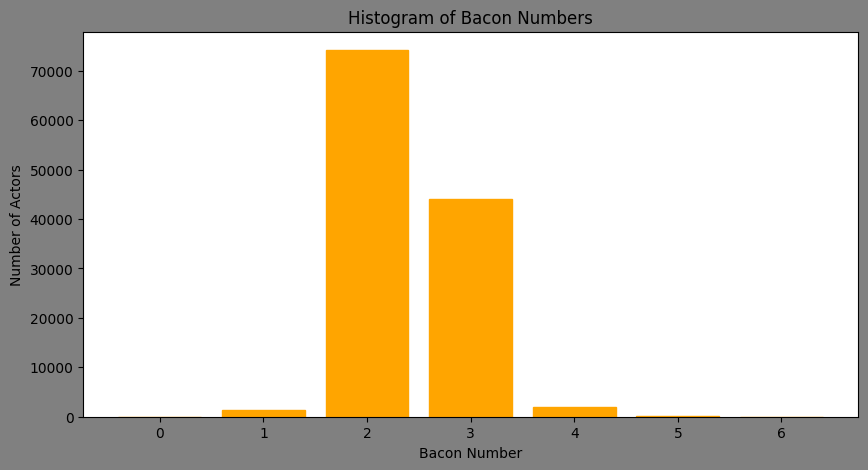

In [24]:
import matplotlib.pyplot as plt

def create_histogram_and_stats(filename):
    oracle = HollywoodOracle(filename)

    max_bacon_number, _ = oracle.max_number_of_X()
    bacon_counts = {}
    for i in range(max_bacon_number + 1):
        bacon_counts[i] = oracle.count_number_of_X(i)
    

    for bacon_number, count in bacon_counts.items():
        print(f'Bacon Number {bacon_number}: {count} actors')

    average_bacon = oracle.average_number_of_X()
    print(f'Average Bacon Number: {average_bacon:.2f}')

    plt.figure(figsize=(10, 5) , facecolor='grey' )
    plt.bar(bacon_counts.keys(), bacon_counts.values(), color='orange', edgecolor='orange')
    plt.xlabel('Bacon Number')
    plt.ylabel('Number of Actors')
    plt.title('Histogram of Bacon Numbers')
    plt.xticks(list(bacon_counts.keys()))
    plt.show()

create_histogram_and_stats('small_dataset_utf8.txt')

### 3.b. Gráfico do “número de X” médio considerando como o “centro do universo” cada um dos 20 atores mais populares de Hollywood nos anos 2000, segundo o IMBD (usando uma folha de excel)